# The Iris dataset is a Classification problem because the response is categorical

# Importing libraries

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the iris dataset

In [2]:
# Load and return the iris dataset (classification), it returns Bunch (Dictionary-like) object
iris = load_iris()

# We can view the iris data, feature names

In [3]:
# since iris is a Bunch object, we can read the data using its attribute called data
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [4]:
# know the shape of the dataset
iris.data.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print("shape of the target ", iris.target.shape)

shape of the target  (150,)


In [7]:
# each number represents the species of each observation 0 = setosa, 1 = versicolor, 2 = virginica
print("Target names: ", iris.target_names)
print("Unique target value ",np.unique(iris.target))

species_key_value = {}
for key,val in enumerate(iris.target_names):
    species_key_value[key] = val

Target names:  ['setosa' 'versicolor' 'virginica']
Unique target value  [0 1 2]


In [8]:
# we will save feature matrix in X and response vector in y
X = iris.data
y = iris.target

# Visualizing the datset

([], <a list of 0 Text yticklabel objects>)

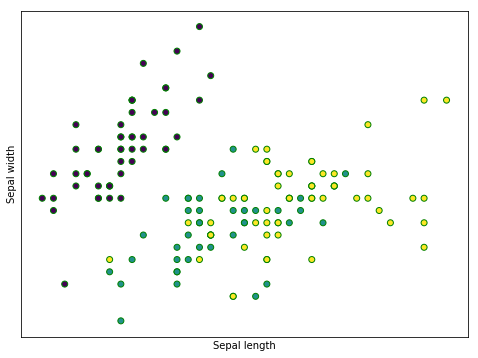

In [9]:
plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y,
            edgecolor='g', cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

In [10]:
# each point represents an observation and the color of the point represents its response class 
# which is red, orange and yellow

# K-nearest neighbors (KNN) classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# instantiate the estimator KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) 

In [13]:
# Fit the model with the feature matrix X and the response y
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
# predict out of sample data using the fitted model and returns a numpy array
predicted_array = knn.predict([[3, 5, 4, 2]])

In [15]:
# sklearn doesn't know about the value 2, and we know that it is the encoding value for verginica. 
for value in predicted_array:
    print("The predicted species is", species_key_value.get(value))

The predicted species is virginica


In [16]:
# for more than 1 sample datas
predicted_array = knn.predict([[3, 5, 4, 2], [5,4,3,2]])

In [17]:
for value in predicted_array:
    print("The predicted species is", species_key_value.get(value))

The predicted species is virginica
The predicted species is versicolor


# Tuning the parameter

In [18]:
# Tuning the parameter of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) 

In [19]:
# Fit the model with the feature matrix X and the response y
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
predicted_array = knn.predict([[3, 5, 4, 2], [5,4,3,2]])

In [21]:
for value in predicted_array:
    print("The predicted species is", species_key_value.get(value))

The predicted species is versicolor
The predicted species is versicolor
